<a href="https://colab.research.google.com/github/soyoung33500/Video/blob/main/%EC%83%88%EB%A1%9C%EC%9A%B4_%ED%85%8C%EC%8A%A4%ED%8A%B8_%EC%98%81%EC%83%81_%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **자신이 학습한 모델이 있는 파일의 뒷부분에 복사 붙여넣기 하셔서 실행시키시면 됩니다**

# 새로운 테스트 영상

In [ ]:
# 스포츠 종류
# 0 : 'CricketShot'
# 1 : 'Punch'
# 2 : 'TennisSwing'
text_label

array(['CricketShot', 'Punch', 'TennisSwing'], dtype=object)

---
새로 입력된 데이터 수동입력

In [ ]:
# video_name 에 동영상 파일 이름 입력
# label 에 text_label을 참고 하여 해당하는 스포츠 종류의 index 입력
new = pd.DataFrame({"video_name" : ["tennis01.mp4", "tennis02.mp4", "tennis03.mp4", "tennis04.mp4", "punch01.mp4", "punch02.mp4", "punch03.mp4", "punch04.mp4", "cricket01.mp4", "cricket02.mp4", "cricket03.mp4"], "label" : [2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0]})
new

,video_name,label
0,Tennis01.mp4,2
1,Tennis02.mp4,2
2,Tennis03.mp4,2


---
### 동영상 파일 자동으로 입력해주는 데이터프레임

#### 공유문서함의 "비디오 분류_1조" 폴더를 내 드라이브에 바로가기 추가를 하시면 파일 경로를 따로 수정하지 않고 바로 사용해도 실행됩니다.

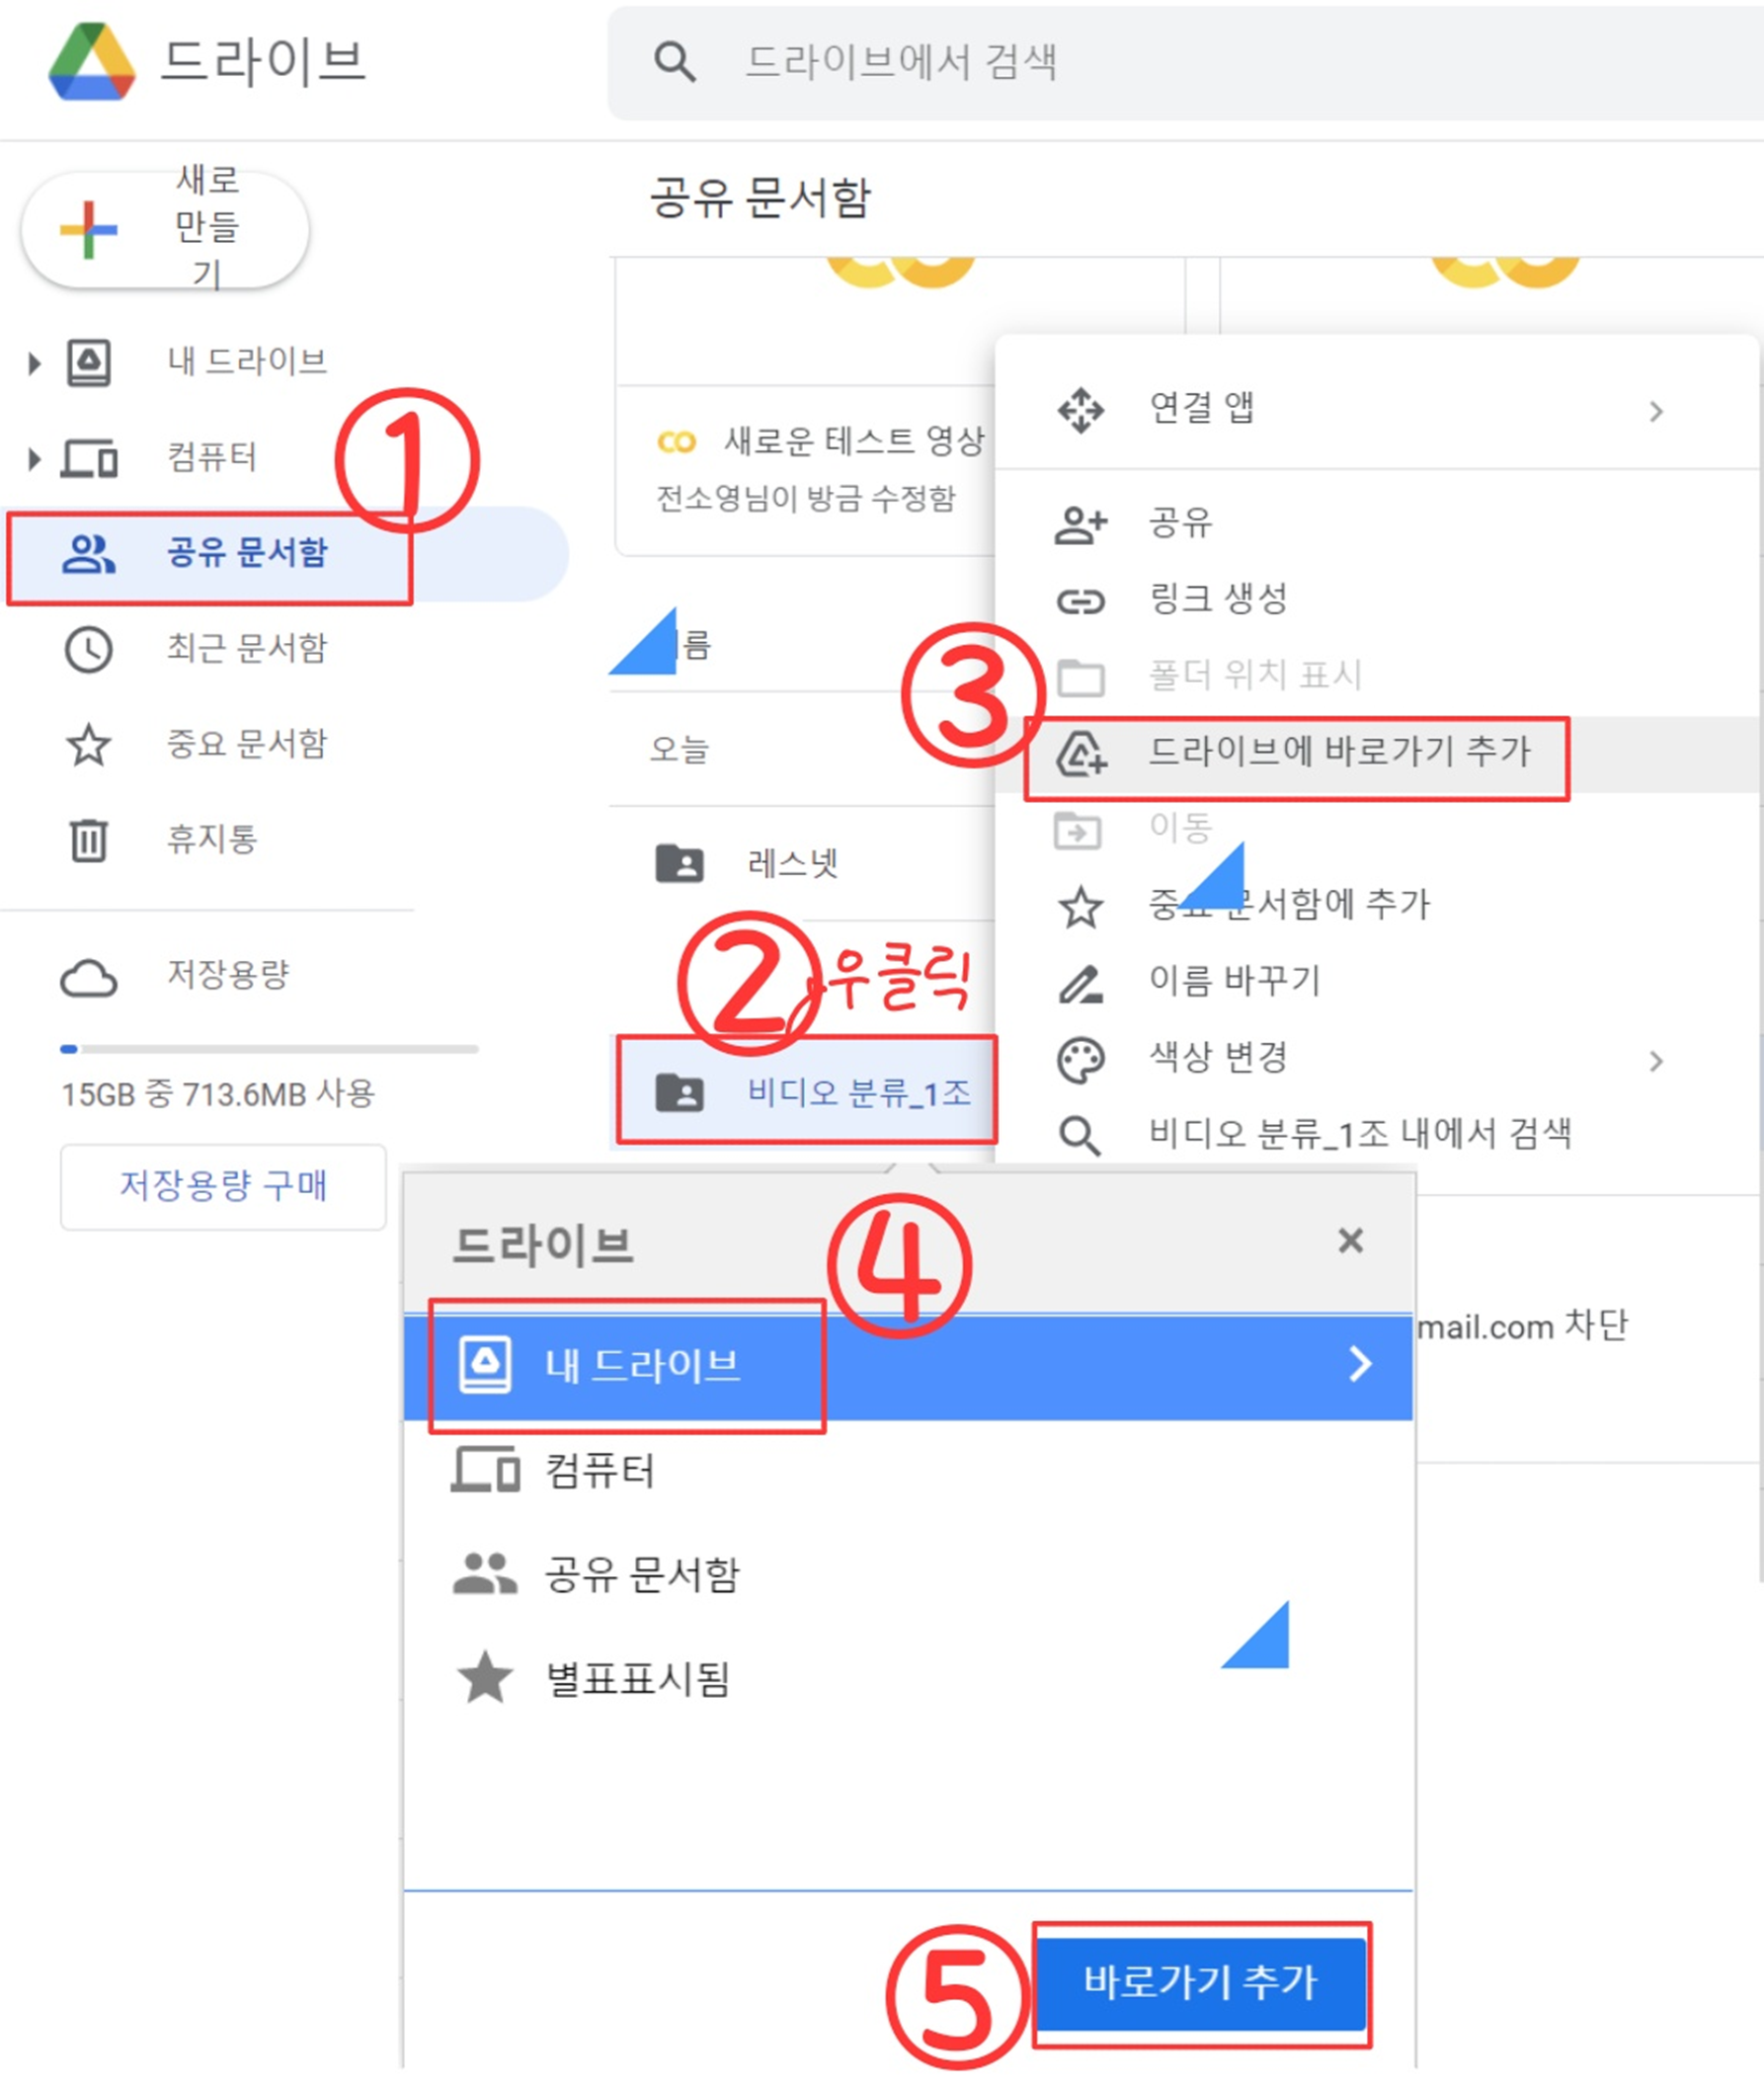

In [ ]:
# 해당 경로에 있는 .mp4 파일명 리스트 가져오기
import os
path = '/content/drive/MyDrive/비디오 분류_1조/new_test/'
file_list_dir = os.listdir(path)
# 파일명 끝이 .mp4인 경우 file_list 에 추가
file_list = [file for file in file_list_dir if file.endswith('.mp4')]

In [ ]:
# label을 입력할 빈 리스트 생성
label = []
for i in range(len(file_list)):
    # 파일명에 'cricket'이 있으면 label에 0 입력
    if 'cricket' in file_list[i]:
        label.append(0)
    # 파일명에 'punch'이 있으면 label에 1 입력
    elif 'punch' in file_list[i]:
        label.append(1)
    # 파일명에 'tennis'이 있으면 label에 2 입력
    elif 'tennis' in file_list[i]:
        label.append(2)
    # 위의 것 중 어느 것에도 해당되지 않으면 잘못된 파일명
    else:
        print('잘못된 파일명')

In [ ]:
# video_name 에 동영상 파일 이름이 저장돼있는 file_list 입력
# 해당하는 스포츠 종류의 index가 저장돼있는 label 입력
new = pd.DataFrame({"video_name" : file_list, "label" : label})
new

,video_name,label
0,tennis01.mp4,2
1,tennis02.mp4,2
2,tennis03.mp4,2
3,tennis04.mp4,2
4,punch01.mp4,1
5,punch02.mp4,1
6,punch03.mp4,1
7,punch04.mp4,1
8,cricket01.mp4,0
9,cricket02.mp4,0


---

In [ ]:
# 모든 비디오 파일의 이미지와 종류를 리턴
# prepare_all_videos(video_name , label, root_dir, is_train)
# video_name : 비디오 파일명
# label: 비디오 파일 종류
# root_dir : 비디오 파일 경로
# is_train : train 데이터 여부 (test 데이터이므로 여기서는 False)
new_X_test, new_y_test = prepare_all_videos(new["video_name"],
                                            new["label"] ,
                                            "/content/drive/MyDrive/비디오 분류_1조/new_test/",
                                            False)

3it [00:03,  1.14s/it]


In [ ]:
# model 은 본인이 학습한 모델의 이름을 적어주시면 됩니다
pred01 = model.predict(new_X_test, batch_size=1)

In [ ]:
# 어떤 label 값으로 예측했는지 확인
# np.argmax(pred01, axis=1) : pred01 최대값의 인덱스를 리턴
# axis = 1 : 각 줄에서 최대값의 인덱스를 리턴
pred02 = np.argmax(pred01, axis=1)
pred02

array([2, 2, 2])

In [ ]:
# 원래 참값의 label 값
# np.argmax(y_test, axis=1) : y_test(원핫 인코딩 돼있음) 최대값의 인덱스를 리턴
# axis = 1 : 각 줄에서 최대값의 인덱스를 리턴
target = np.argmax(new_y_test, axis=1)
target

array([2, 2, 2])

In [ ]:
# target == pred02 : target과 pred02가 같으면 True 다르면 False 리턴
pred03 = (target == pred02)
pred03

array([ True,  True,  True])

In [ ]:
# 조건이 일치하는 인덱스
np.where(pred03 == False)

(array([], dtype=int64),)

In [ ]:
# True는 1로 False는 0으로 변환해서 합을 계산
np.sum(pred03)

3

In [ ]:
# 정확도 직접 계산
# np.sum(pred03) : True는 1로 False는 0으로 변환해서 합을 계산 (즉 True의 개수)
# len(pred03) : pred03의 줄의 수를 리턴
acc = np.sum(pred03) / len(pred03)
acc

1.0